In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


ModuleNotFoundError: No module named 'dmba'

In [17]:
sales_df=pd.read_csv('cleaned_sales_data.csv')
rent_df=pd.read_csv('cleaned_rent_data.csv')
sales_df.head()

,Unnamed: 0,Address,Price,Beds,Baths,Area_Sqft,City,Zipcode,Time_on_Redfin(days),Property Type,Year_built,Community,Lot_Size_Sqft,Est_Monthly_Payt,Est_Redfin_Price,Price/Sq.Ft.,Buyer_Agent_Commission,HOA_Dues,Style
0,0,"41247 Apricot Ln,Fremont, CA 94539",1999888,4,2.0,1698,Fremont,94539,5,Single Family Residential,1960.0,FREMONT,6720.0,14526,2134398,"$1,178",2.5,0.0,Unknown
1,1,"34116 Pavia Ter,Fremont, CA 94555",1180000,3,3.5,1387,Fremont,94555,1,Condo,2012.0,ARDENWOOD AREA,39639.0,8855,1161551,$851,2.5,284.0,Contemporary
2,2,"36778 Oak St,Fremont, CA 94536",1499888,3,2.0,1610,Fremont,94536,1,Single Family Residential,1961.0,FAIR OAKS,6978.0,10894,1513958,$932,2.5,0.0,Ranch
3,3,"4046 Abbey Ter #113,Fremont, CA 94536",598500,2,2.0,823,Fremont,94536,1,Condo,1986.0,CENTRAL PARK,25264.0,4757,598791,$727,2.5,410.0,Contemporary
4,4,"345 Torrano Cmn,Fremont, CA 94536",799888,2,1.0,1016,Fremont,94536,1,Townhouse,1975.0,NILES THE TREES,2448.0,6150,798177,$787,2.5,340.0,Unknown


In [3]:
rent_df.head()

,Unnamed: 0,Address,Price,Beds,Baths,Area_Sqft,City,Zipcode,Parking_Size,In_Unit_Aminity_Count,Community_Aminity_Count
0,0,"Palmia, Aged 55+ Luxury Apartments47207 Missio...",3020,2,2.0,927.5,Fremont,94539,1,9,9
1,1,"Creekside Village2999 Sequoia Ter,Fremont, CA ...",2551,2,2.0,775.0,Fremont,94536,1,15,25
2,2,"Sundale North And South39900 Blacow Rd,Fremont...",2250,2,1.5,805.5,Fremont,94538,1,10,12
3,3,"39993 Fremont Blvd,Fremont, CA 94538",2300,1,1.0,931.0,Fremont,94538,0,10,2
4,4,"Pebble Creek Communities40777 High St,Fremont,...",2430,2,1.0,774.0,Fremont,94538,1,14,12


In [4]:
#Decribing sales data
sales_df.describe()

,Unnamed: 0,Price,Beds,Baths,Area_Sqft,Zipcode,Time_on_Redfin(days),Lot_Size_Sqft,Est_Monthly_Payt,Est_Redfin_Price,Buyer_Agent_Commission,HOA_Dues
count,1937.000000,1.937000e+03,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1.937000e+03,1937.000000,1.937000e+03,1937.000000,1937.000000
mean,968.000000,1.527432e+06,3.272586,2.402426,1930.287042,94620.591120,42.009293,2.916039e+04,11351.381002,1.469275e+06,2.484566,311.078472
std,559.308055,1.650292e+06,2.192926,1.872217,1742.552955,346.968395,75.474367,2.546181e+05,11895.792088,1.392513e+06,0.213428,912.610979
min,0.000000,0.000000e+00,0.000000,0.000000,380.000000,94002.000000,0.000000,1.000000e+02,327.000000,3.845400e+04,0.330000,0.000000
25%,484.000000,6.950000e+05,2.000000,2.000000,1140.000000,94403.000000,5.000000,4.400000e+03,5575.000000,7.271640e+05,2.484566,0.000000
50%,968.000000,1.150000e+06,3.000000,2.000000,1560.000000,94590.000000,17.000000,6.800000e+03,8353.000000,1.265284e+06,2.500000,0.000000
75%,1452.000000,1.698900e+06,4.000000,3.000000,2243.000000,94903.000000,44.000000,2.916039e+04,12643.000000,1.594973e+06,2.500000,338.000000
max,1936.000000,1.975000e+07,56.000000,49.500000,43760.000000,95148.000000,809.000000,1.054152e+07,143453.000000,1.614532e+07,5.000000,7331.000000


In [5]:
#Describing the rent data
rent_df.describe()

,Unnamed: 0,Price,Beds,Baths,Area_Sqft,Zipcode,Parking_Size,In_Unit_Aminity_Count,Community_Aminity_Count
count,1289.000000,1.289000e+03,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,644.000000,4.211580e+04,2.501939,1.915826,1309.422033,94172.433670,0.141971,3.283941,2.077580
std,372.246558,2.592661e+05,4.704320,2.927384,2291.162879,6698.325674,0.472061,3.806671,3.920626
min,0.000000,0.000000e+00,0.000000,0.000000,121.000000,-6667.000000,0.000000,0.000000,0.000000
25%,322.000000,2.200000e+03,1.000000,1.000000,700.000000,94536.000000,0.000000,1.000000,0.000000
50%,644.000000,2.795000e+03,2.000000,1.000000,934.000000,94606.000000,0.000000,2.000000,1.000000
75%,966.000000,3.795000e+03,3.000000,2.000000,1360.000000,94903.000000,0.000000,4.000000,2.000000
max,1288.000000,4.938420e+06,126.000000,45.000000,42794.000000,95148.000000,4.000000,21.000000,25.000000


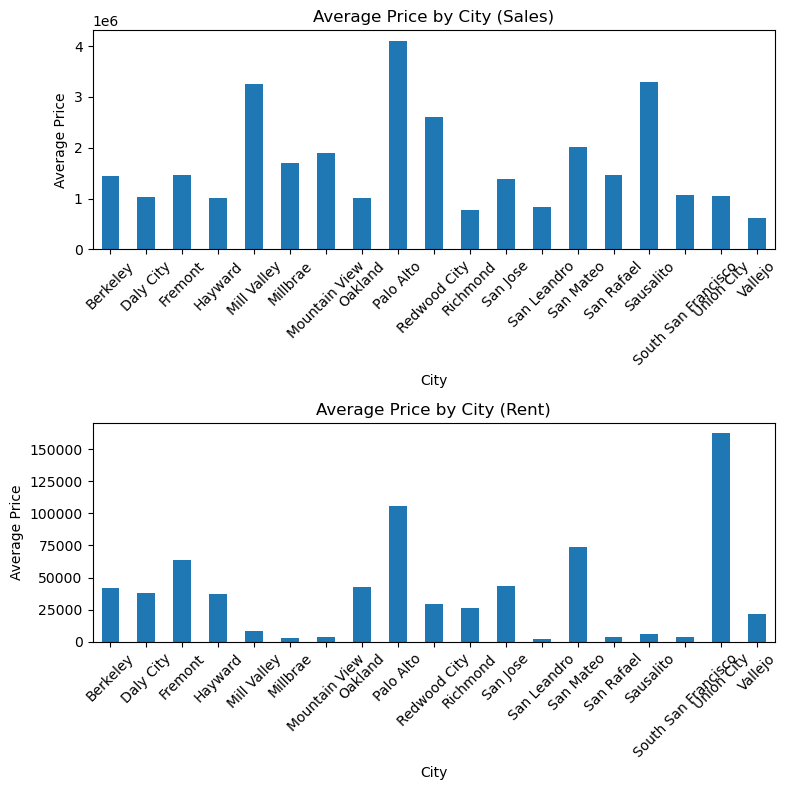

In [6]:
#Comparing city and price for sales and rental------??????
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

avg_prices_by_city1 = sales_df.groupby('City')['Price'].mean()
avg_prices_by_city1.plot(kind='bar', ax=axs[0], rot=45)
axs[0].set_xlabel('City')
axs[0].set_ylabel('Average Price')
axs[0].set_title('Average Price by City (Sales)')


avg_prices_by_city2 = rent_df.groupby('City')['Price'].mean()
avg_prices_by_city2.plot(kind='bar', ax=axs[1], rot=45)
axs[1].set_xlabel('City')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by City (Rent)')

plt.tight_layout()

plt.show()

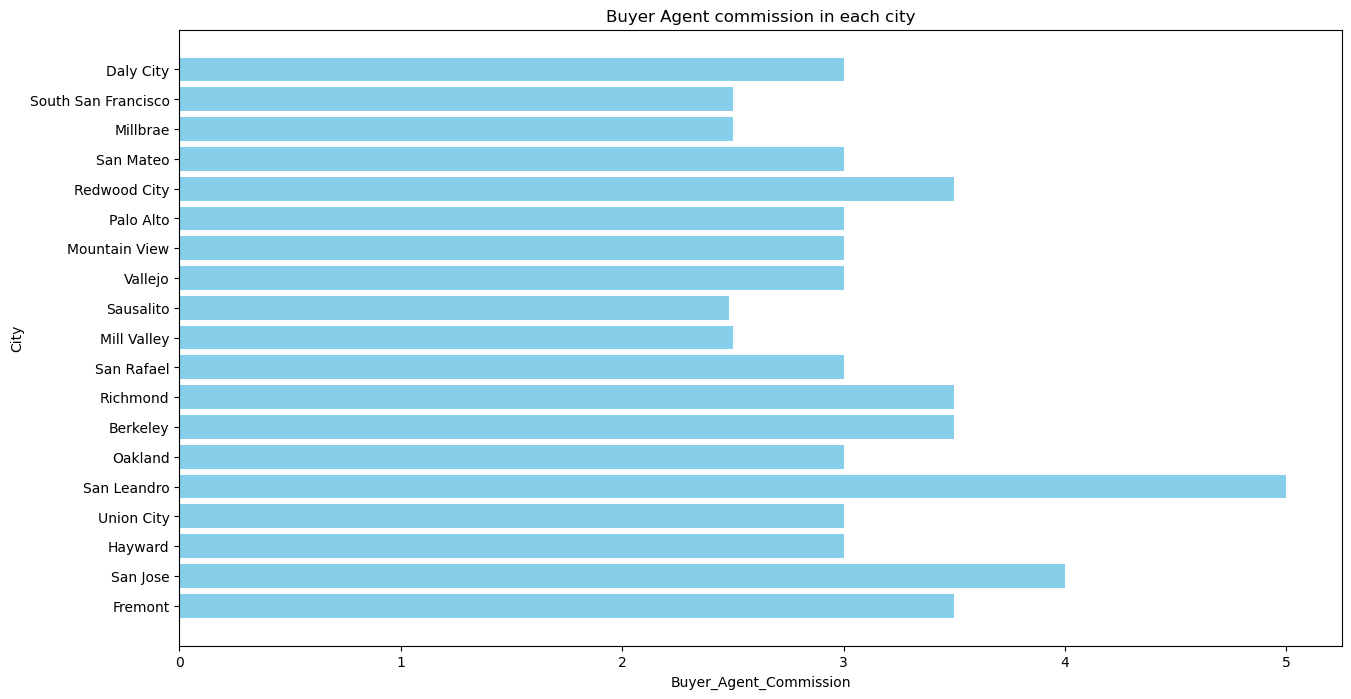

In [7]:
#>>> In here we check which city has higher rate of Agent commission.
plt.figure(figsize=(15, 8))
plt.barh(sales_df['City'], sales_df['Buyer_Agent_Commission'], color='skyblue')
plt.xlabel('Buyer_Agent_Commission')
plt.ylabel('City')
plt.title('Buyer Agent commission in each city')
plt.show()


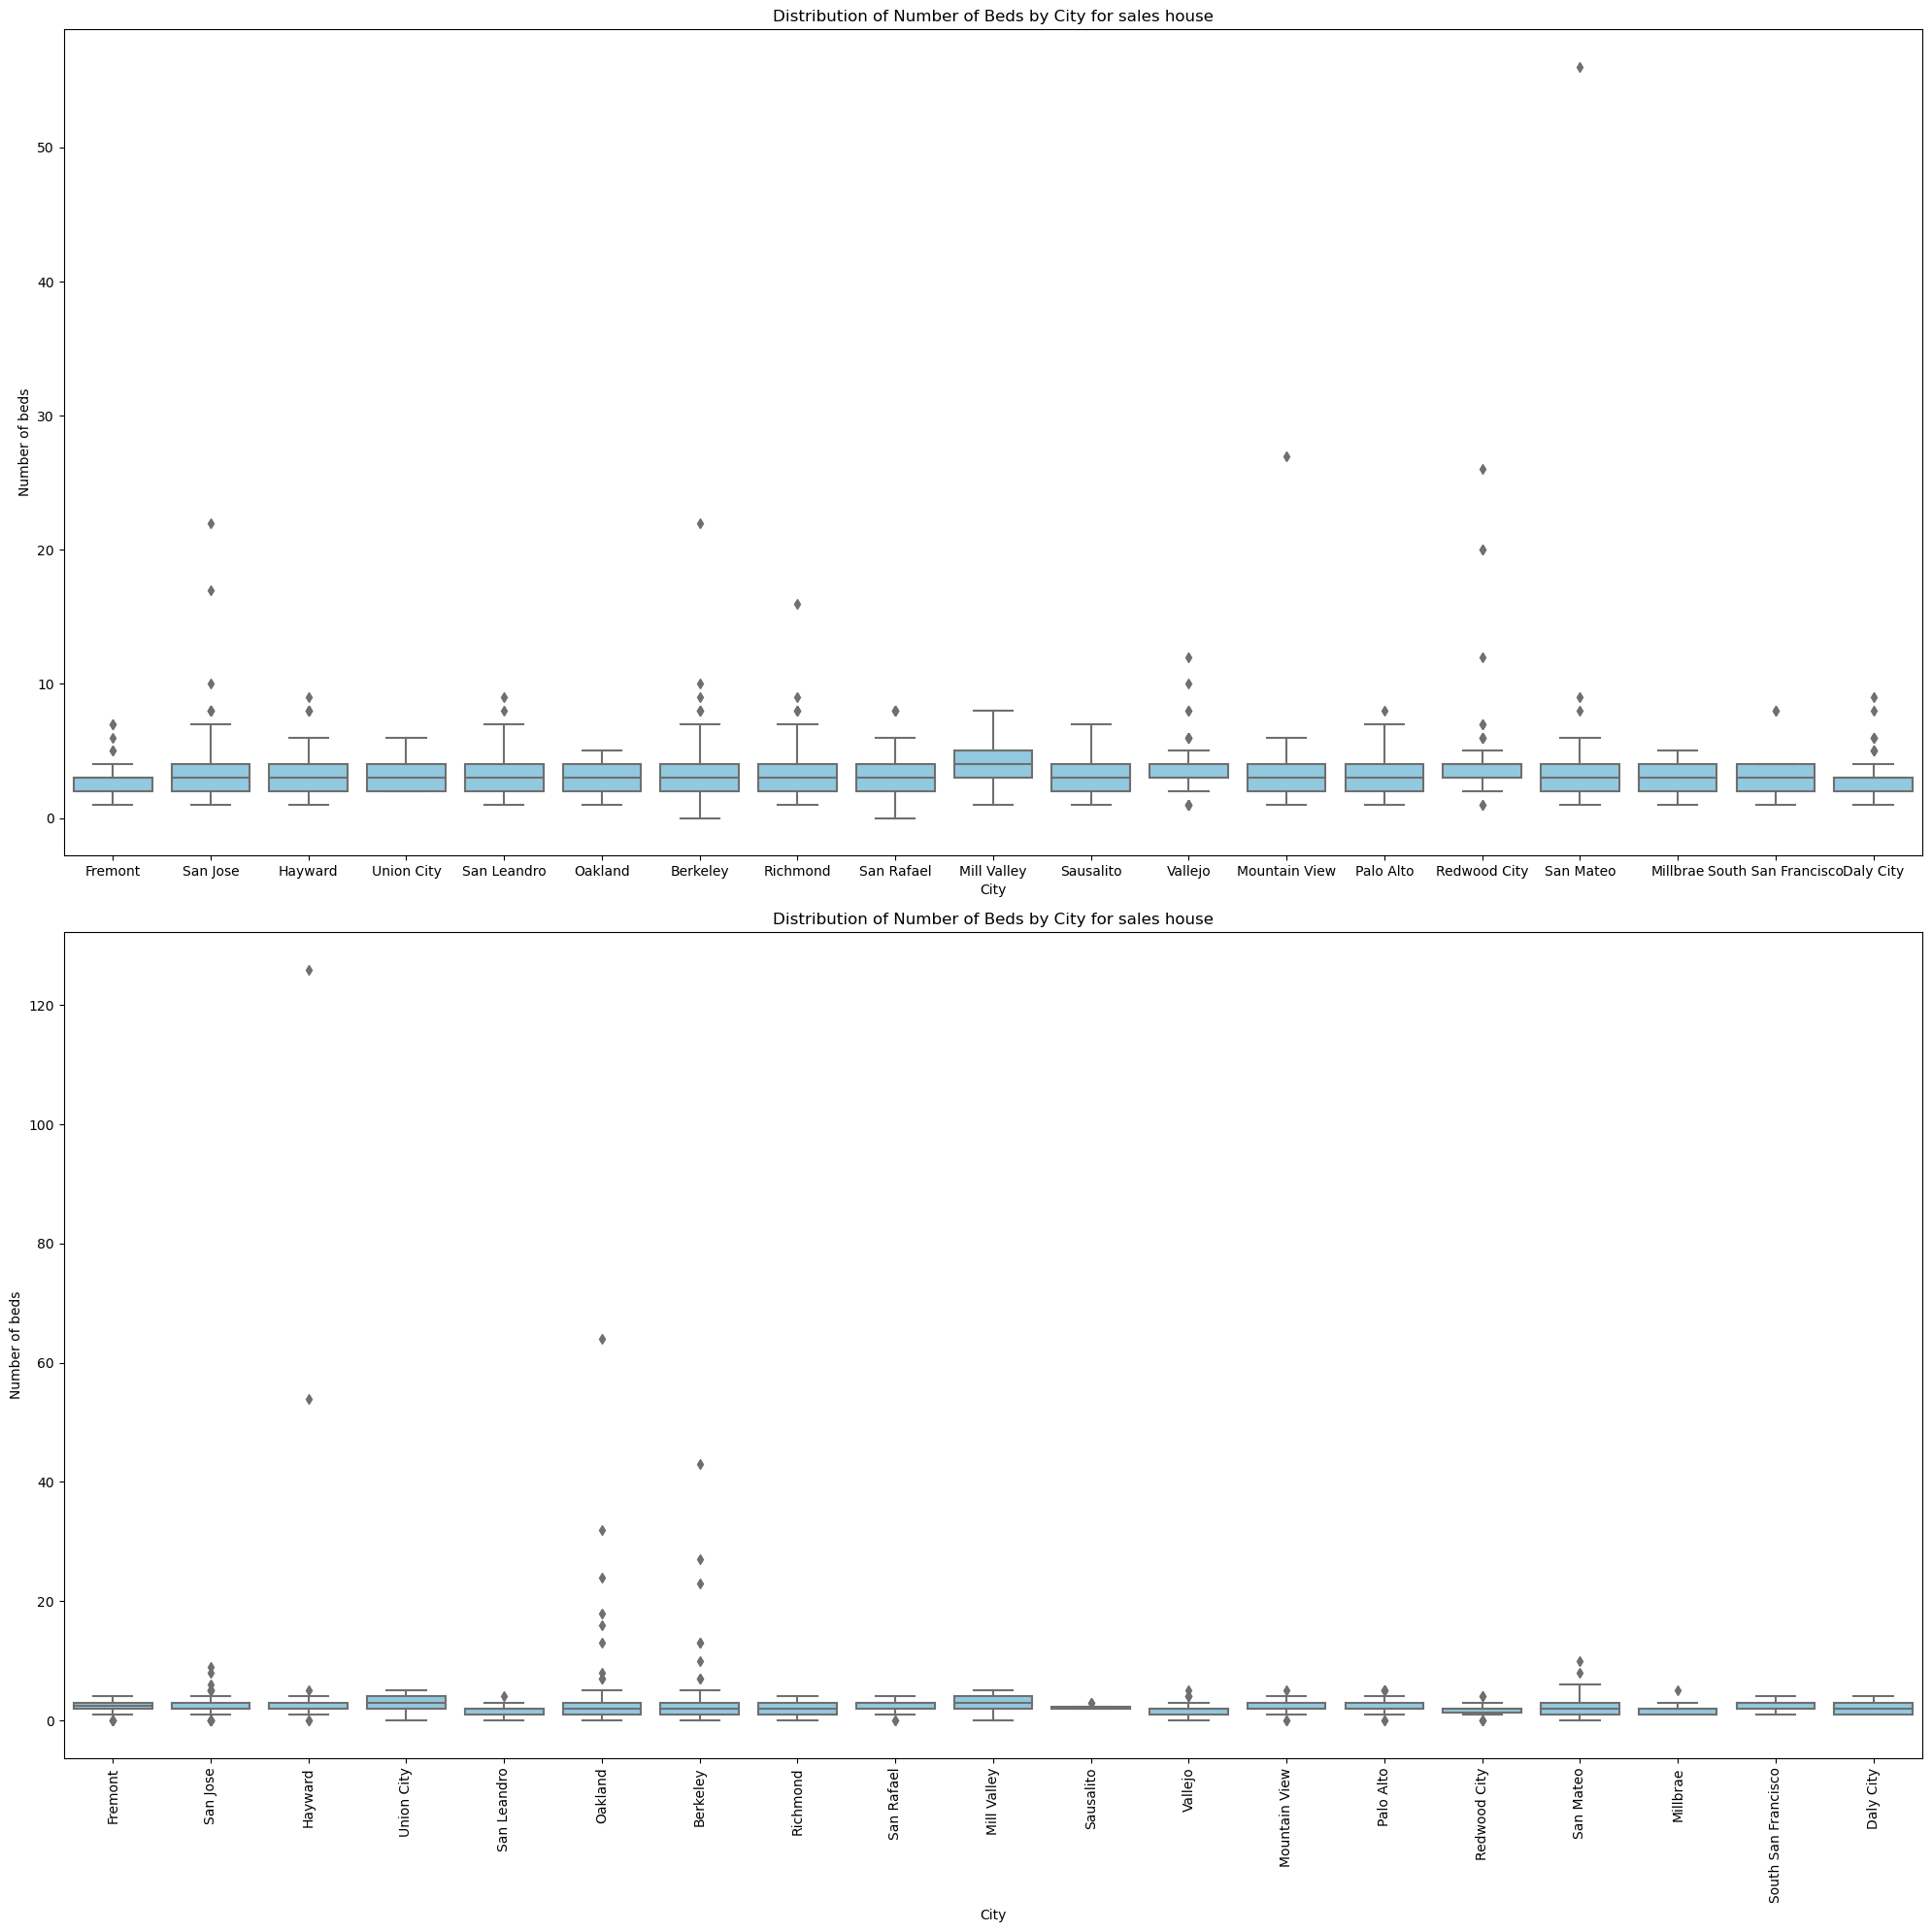

In [8]:
#>>>Comparing No of beds in each city-sales house
#>>>can mention that the cities which doent have any outliers.
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
no_beds_wrt_city = sns.boxplot(x='City', y='Beds', data=sales_df, color='skyblue',ax=axs[0])
plt.xticks(rotation=90)
axs[0].set_xlabel('City')
axs[0].set_ylabel('Number of beds')
axs[0].set_title('Distribution of Number of Beds by City for sales house')
no_beds_wrt_city = sns.boxplot(x='City', y='Beds', data=rent_df, color='skyblue',ax=axs[1])
plt.xticks(rotation=90)
axs[1].set_xlabel('City')
axs[1].set_ylabel('Number of beds')
axs[1].set_title('Distribution of Number of Beds by City for sales house')
plt.tight_layout() 
plt.show()


In [9]:
sales_df=sales_df[sales_df['Beds']<=5]
sales_df=sales_df[sales_df['Beds']>=1]
rent_df=rent_df[rent_df['Beds']<=5]
rent_df=rent_df[rent_df['Beds']>=1]

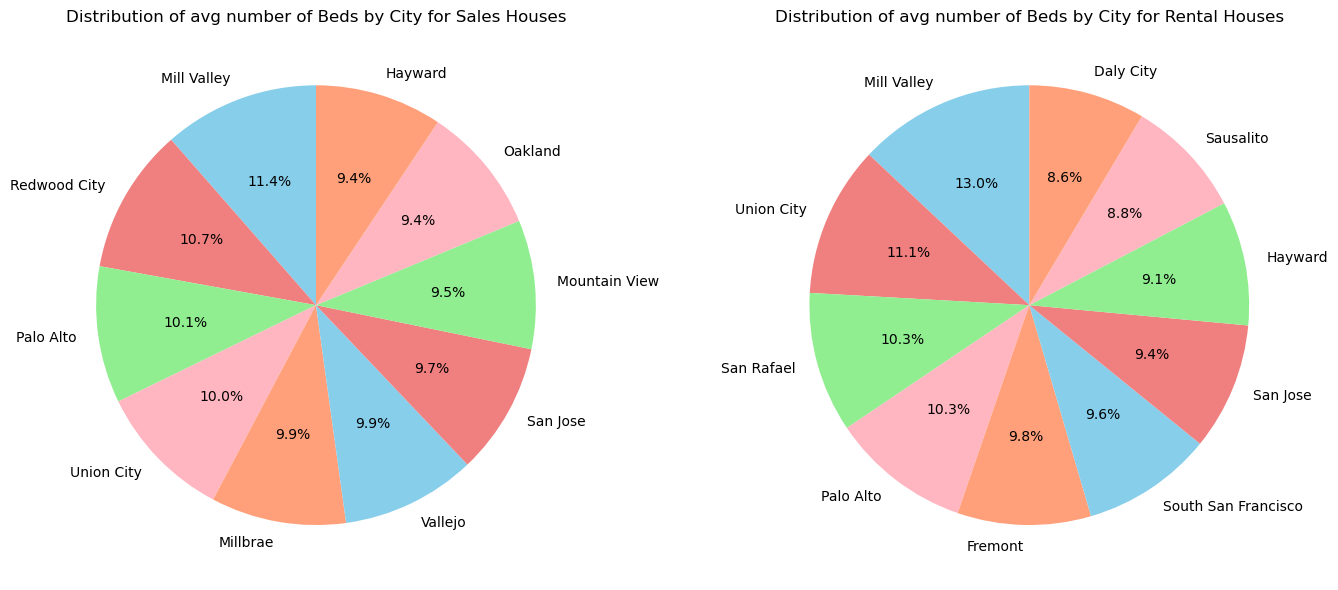

In [10]:
#>>>In here we  plot which of the top 10 cities has more average number of beds of Both Rental and Sales.


#Larger slices represent a larger number of beds, while smaller slices indicate fewer beds.

###Calculating the average number of beds for each city
avg_bedcity_sales = sales_df.groupby('City')['Beds'].mean()
# Sort the data by the average number of beds in descending order
sorted_data = avg_bedcity_sales.sort_values(ascending=False)
t10_city_sales = sorted_data.head(10)

avg_bedscity_rent = rent_df.groupby('City')['Beds'].mean()
# Sort the data by the average number of beds in descending order
sorted_data = avg_bedscity_rent.sort_values(ascending=False)
t10_city_rent = sorted_data.head(10)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].pie(t10_city_sales, labels=t10_city_sales.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon'])
axs[0].set_title('Distribution of avg number of Beds by City for Sales Houses')

axs[1].pie(t10_city_rent, labels=t10_city_rent.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon'])
axs[1].set_title('Distribution of avg number of Beds by City for Rental Houses')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [11]:
sales_df = sales_df.rename(columns={'Price/Sq.Ft.': 'Price_sqft'})


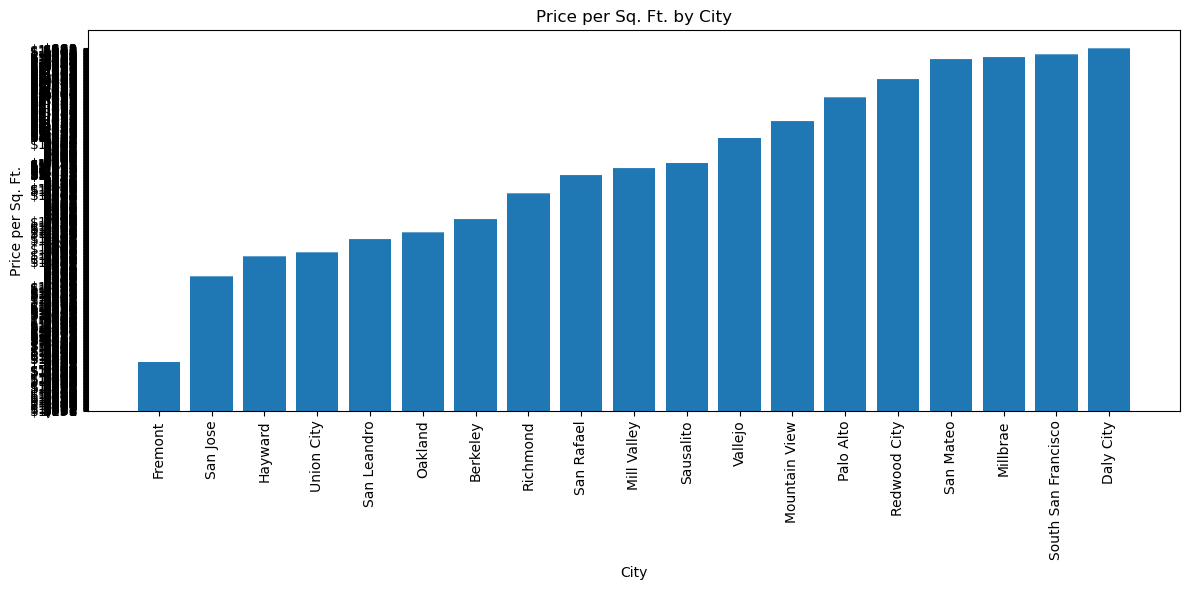

In [12]:
#>>>>need to change the $ from price persqft and give the range to show the graph 

plt.figure(figsize=(12, 6))
plt.bar(sales_df['City'], sales_df['Price_sqft'], alpha=0.7)
plt.xlabel('City')
plt.ylabel('Price per Sq. Ft.')
plt.title('Price per Sq. Ft. by City')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relationship Between Beds and Baths')

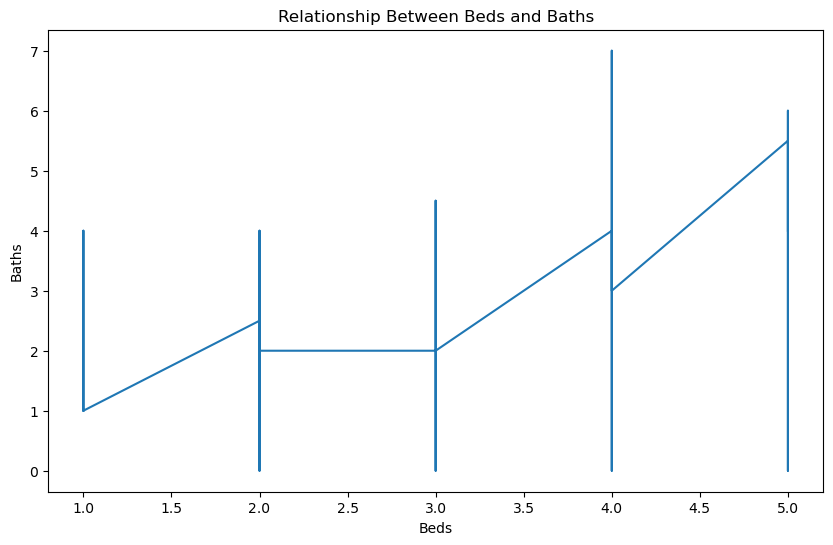

In [13]:
#>>Relationship between baths and beds.
sales_df = sales_df.sort_values(by='Beds')
plt.figure(figsize=(10, 6))
plt.plot(sales_df['Beds'], sales_df['Baths'],linestyle='-')
plt.xlabel('Beds')
plt.ylabel('Baths')
plt.title('Relationship Between Beds and Baths')


In [14]:
plt.scatter(df['Beds'], df['Baths'])
plt.xlabel('Beds')
plt.ylabel('Baths')
plt.title('Scatter Plot: Beds vs. Baths')

NameError: name 'df' is not defined

In [ ]:

# Define custom price per sq. ft. ranges and labels
custom_ranges = [0, 500, 1000, 1500, 2000, 2500, 3000]
custom_labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']

In [175]:
#crosstabs between city and no of beds 
cross_tab = pd.crosstab(sales_df['Beds'], sales_df['City'])
cross_tab

City,Berkeley,Daly City,Fremont,Hayward,Mill Valley,Millbrae,Mountain View,Oakland,Palo Alto,Redwood City,Richmond,San Jose,San Leandro,San Mateo,San Rafael,Sausalito,South San Francisco,Union City,Vallejo
Beds,,,,,,,,,,,,,,,,,,,
1,11,4,6,8,1,1,4,6,2,2,12,20,5,18,26,2,1,0,5
2,23,25,41,19,6,4,22,5,22,16,45,72,27,52,23,9,9,7,32
3,31,25,44,38,12,7,19,14,17,33,51,110,26,22,28,6,16,9,58
4,21,7,28,22,13,2,12,9,23,32,34,83,12,28,27,6,8,8,41
5,3,4,2,5,10,3,6,3,7,11,6,23,3,7,13,1,0,2,8


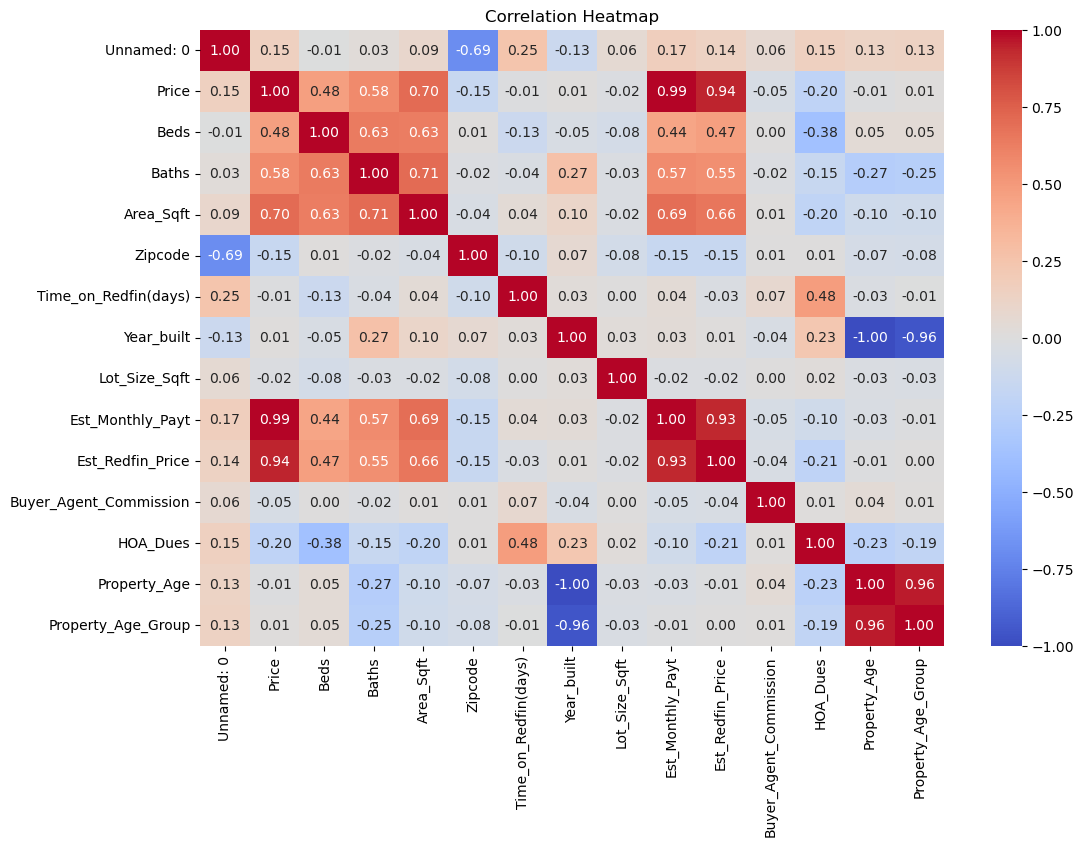

In [177]:
#Heat map
correlation_matrix = sales_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()











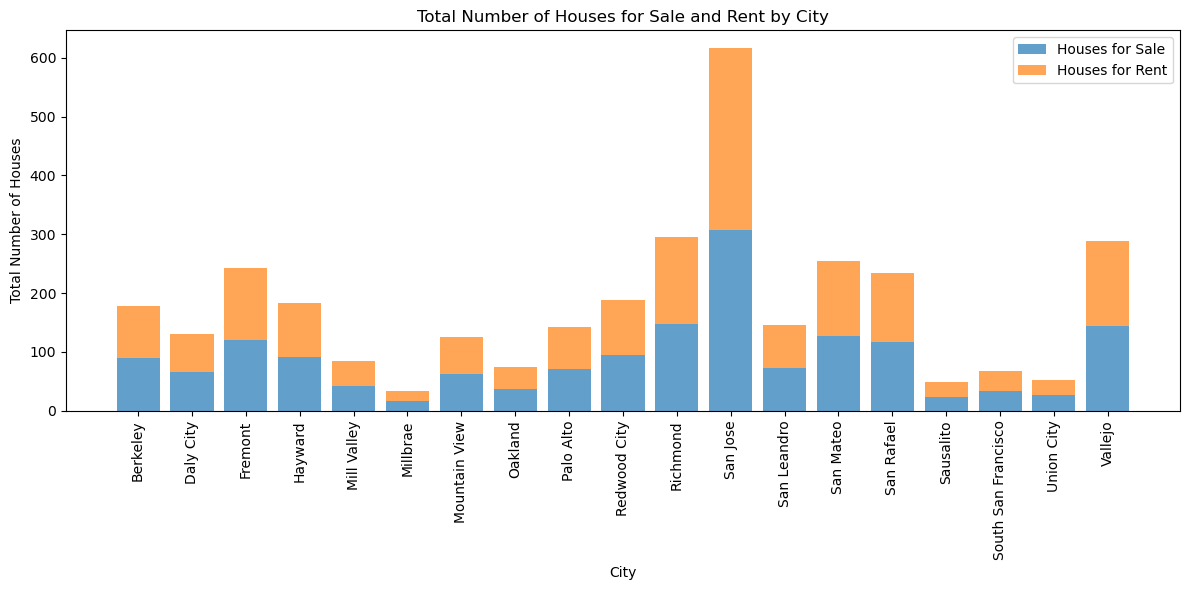

In [186]:
#total number of houses are there in each city for sale or rent.
total_houses = sales_df.groupby('City').size() + rent_df.groupby('City').size()
houses_for_sale = sales_df.groupby('City').size()
houses_for_rent = sales_df.groupby('City').size()
# Create a stacked bar chart
plt.figure(figsize=(12, 6))
p1 = plt.bar(total_houses.index, houses_for_sale, label='Houses for Sale', alpha=0.7)
p2 = plt.bar(total_houses.index, houses_for_rent, bottom=houses_for_sale, label='Houses for Rent', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Total Number of Houses')
plt.title('Total Number of Houses for Sale and Rent by City')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Text(0, 0.5, 'Count')

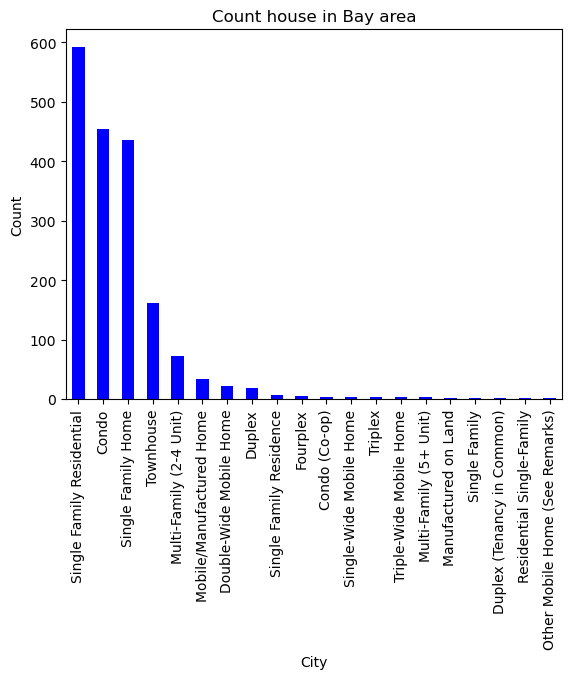

In [144]:
#WHat type of properties available more in bay area for sales
Series_property_type=sales_df['Property Type'].value_counts() 
Series_property_type.plot(kind="bar",color='b')
plt.title('Count house in Bay area')
plt.xlabel('City')
plt.ylabel('Count')

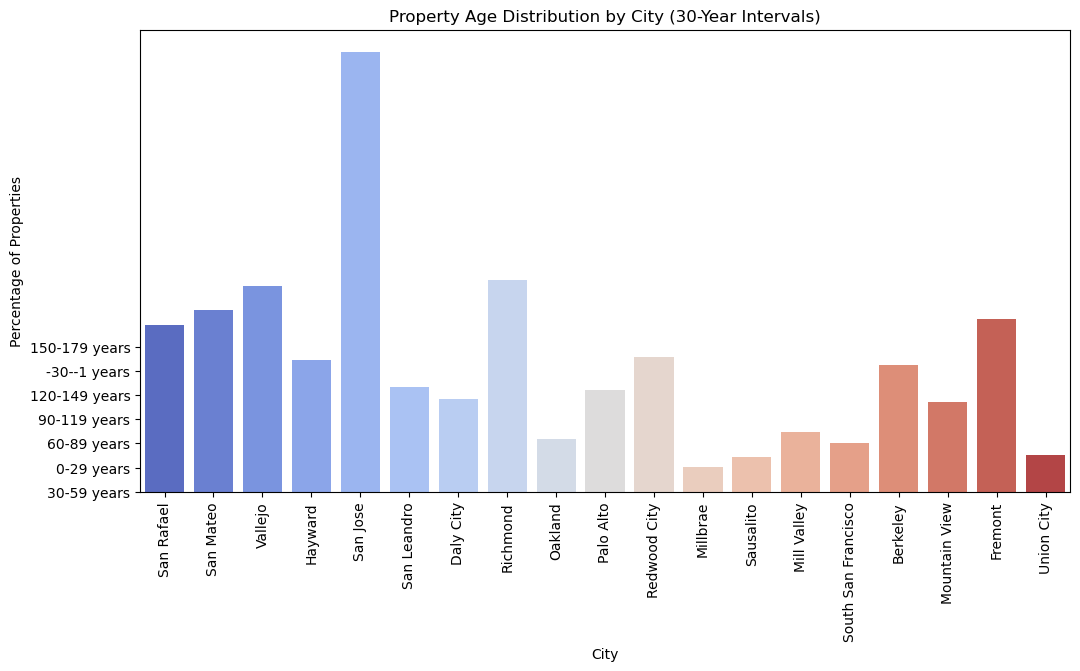

In [28]:
#>>>
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


values_to_drop = ['Unknown']

sales_df = sales_df[~sales_df['Year_built'].isin(values_to_drop)]
current_year = 2023  # Replace with the current year

sales_df['Year_built'] = sales_df['Year_built'].apply(lambda x: int(float(x)))
sales_df['Property_Age'] = current_year - sales_df['Year_built']

# Group properties by City and Property Age in 30-year intervals
sales_df['Property_Age_Group'] = sales_df['Property_Age'] // 30 * 30

# Define custom labels for the y-axis ticks
age_group_labels = [f"{group}-{group+29} years" for group in sales_df['Property_Age_Group'].unique()]

# Create a bar plot to visualize property ages by city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Property_Age_Group', data=sales_df, estimator=lambda x: len(x) / len(sales_df) * 100, palette='coolwarm')
plt.title('Property Age Distribution by City (30-Year Intervals)')
plt.xlabel('City')
plt.ylabel('Percentage of Properties')
plt.xticks(rotation=90)
plt.yticks(range(len(age_group_labels)), age_group_labels)  # Add custom labels to the y-axis
plt.show()

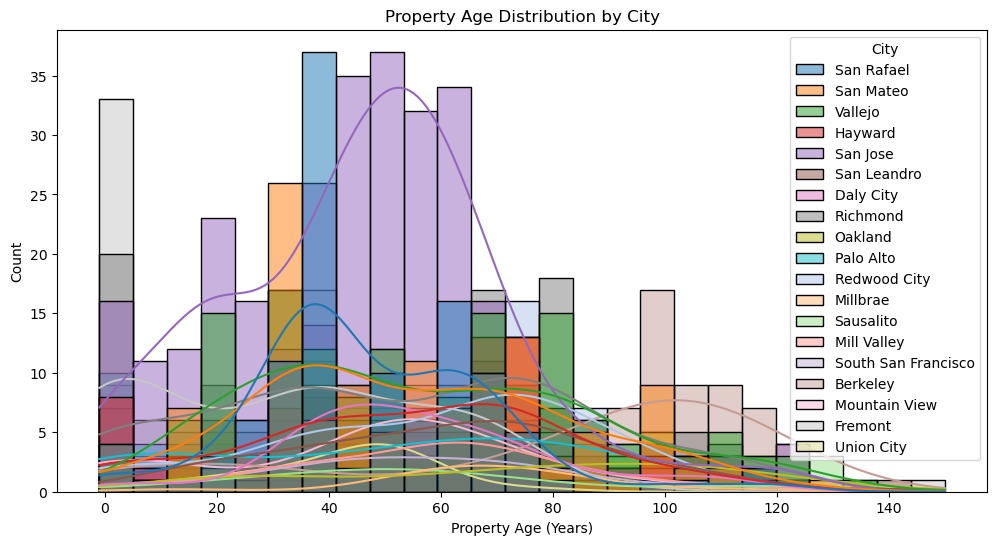

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=sales_df, x='Property_Age', hue='City', kde=True ,palette = [
   "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Yellow
    "#17becf",  # Cyan
    "#aec7e8",  # Light Blue
    "#ffbb78",  # Light Orange
    "#98df8a",  # Light Green
    "#ff9896",  # Light Red
    "#c5b0d5",  # Light Purple
    "#c49c94",  # Light Brown
    "#f7b6d2",  # Light Pink
    "#c7c7c7",  # Light Gray
    "#dbdb8d"   # Light Yellowue
    
])
plt.title('Property Age Distribution by City')
plt.xlabel('Property Age (Years)')
plt.ylabel('Count')
plt.show()


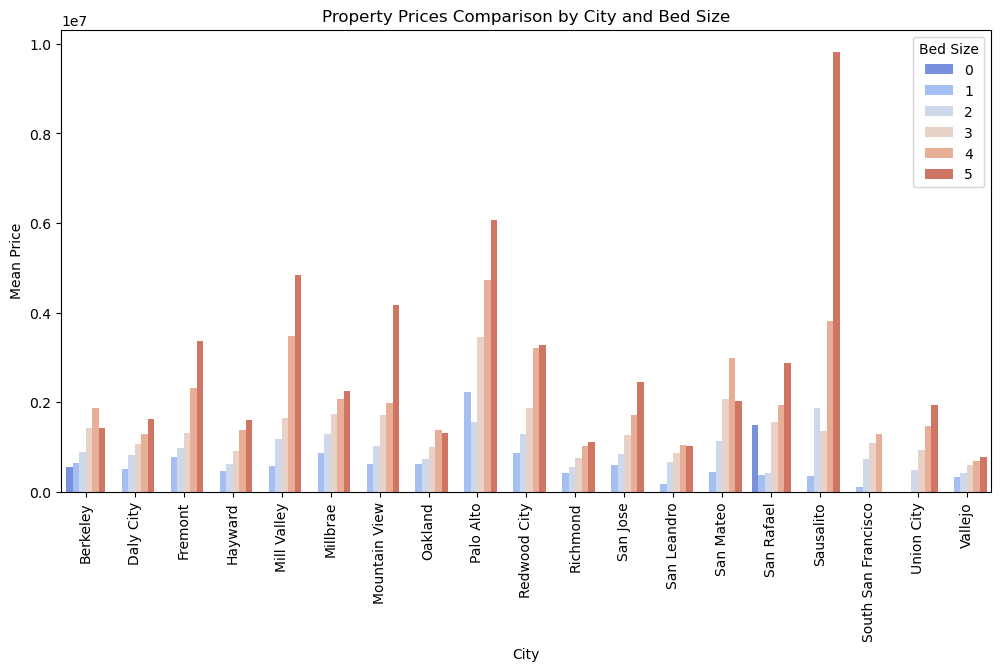

In [146]:
#mean price for each city wrt to no of beds.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

price_comparison = temp_df.groupby(['City', 'Beds'])['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Price', hue='Beds', data=price_comparison, palette='coolwarm')
plt.title('Property Prices Comparison by City and Bed Size')
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.legend(title='Bed Size')
plt.xticks(rotation=90)
plt.show()


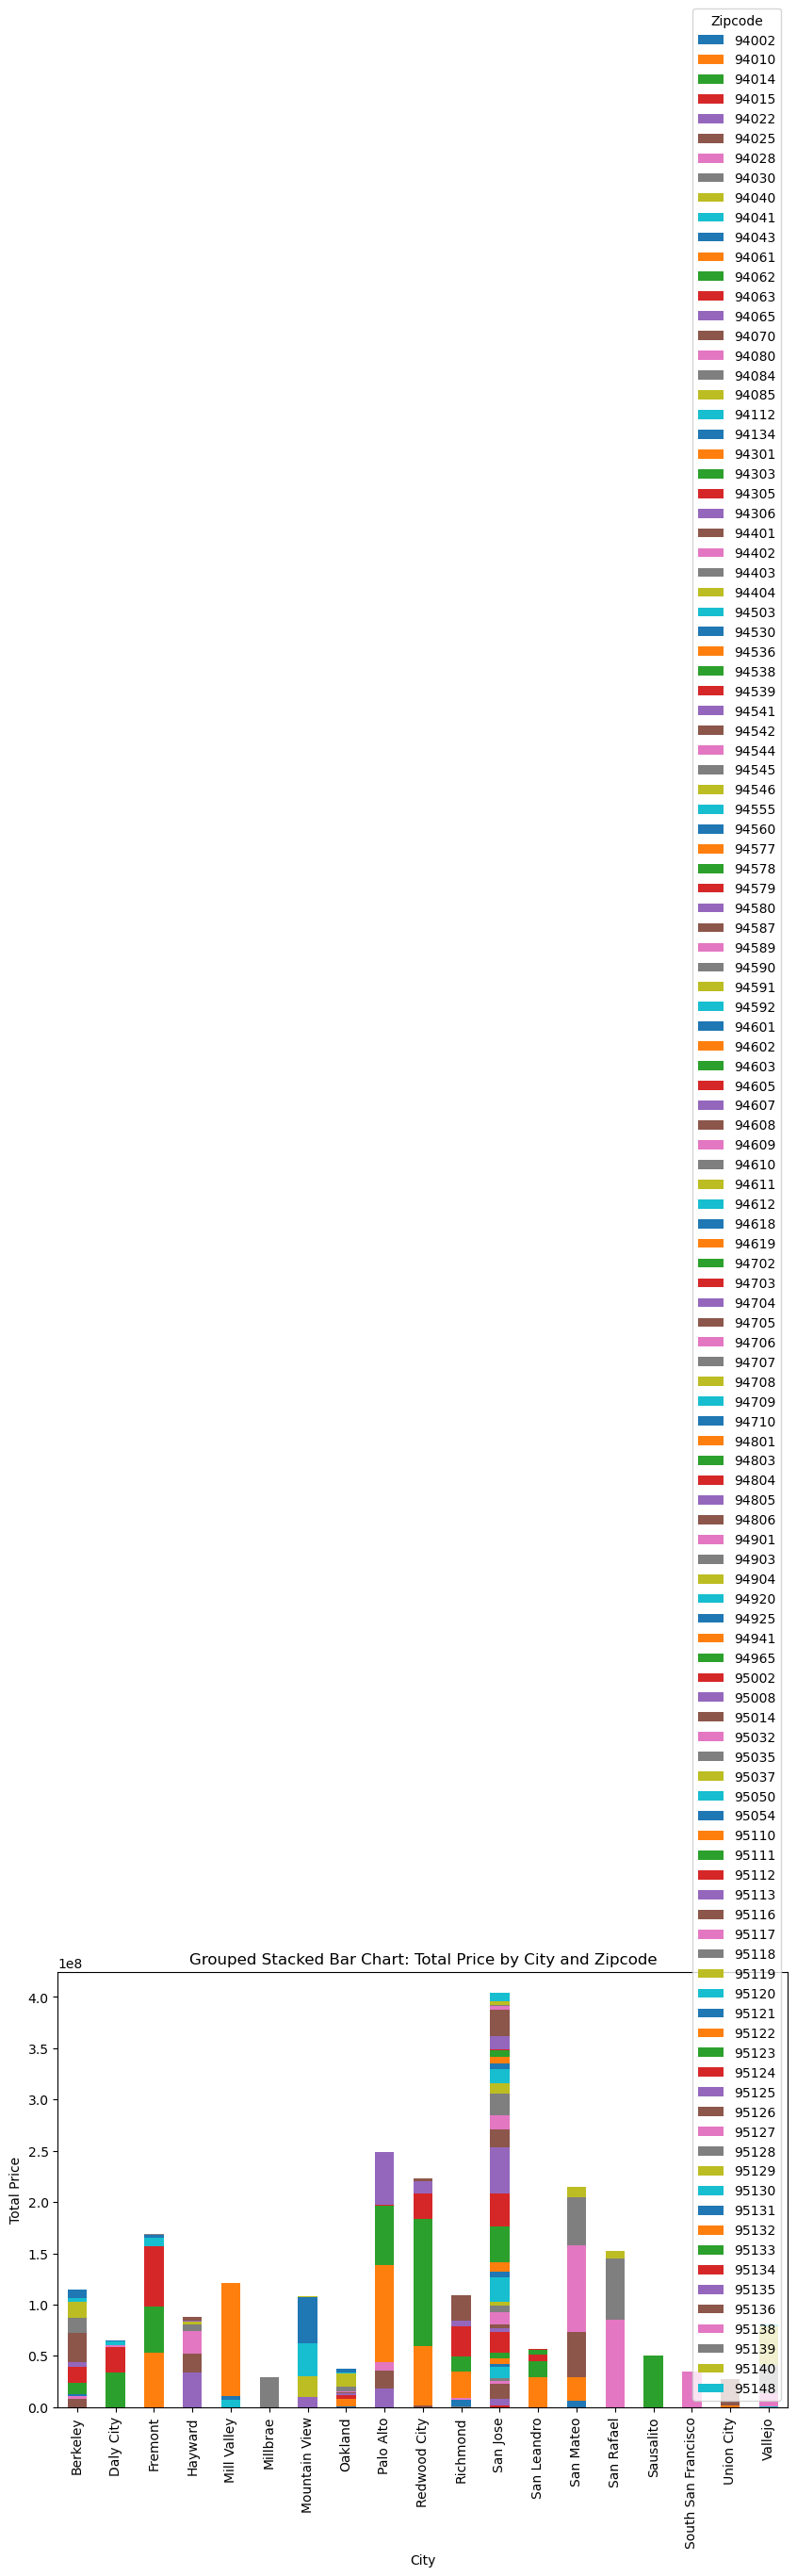

In [42]:
# Group data by 'City' and 'Zipcode' and calculate the sum of 'Price'
city_zipcode_prices = sales_df.groupby(['City', 'Zipcode'])['Price'].sum().reset_index()


# Pivot the data
pivot_df = city_zipcode_prices.pivot(index='City', columns='Zipcode', values='Price')

# Create the stacked bar graph
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('City')
plt.ylabel('Total Price')
plt.title('Grouped Stacked Bar Chart: Total Price by City and Zipcode')

# Show the plot
plt.legend(title='Zipcode')
#plt.tight_layout()
plt.show()

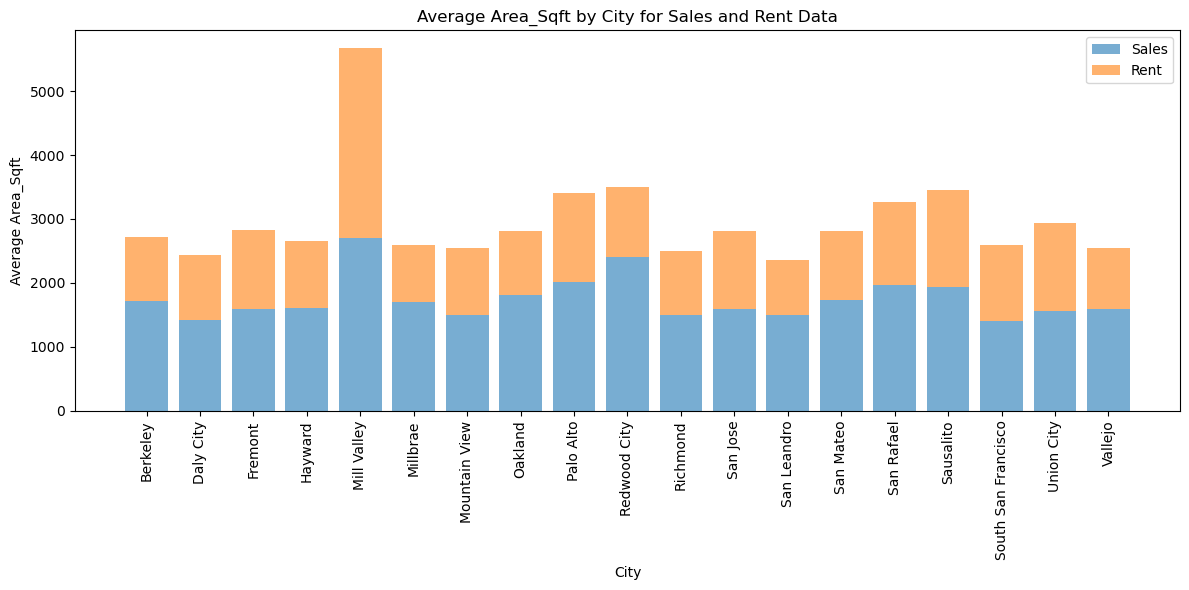

In [40]:
#Which city has highest area_sqft >>> acc to that we cangive which city has higher price per sqft
avg_area_sqft_sales = sales_df.groupby('City')['Area_Sqft'].mean().reset_index()
avg_area_sqft_rent = rent_df.groupby('City')['Area_Sqft'].mean().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
p1 = plt.bar(avg_area_sqft_sales['City'], avg_area_sqft_sales['Area_Sqft'], label='Sales', alpha=0.6)
p2 = plt.bar(avg_area_sqft_rent['City'], avg_area_sqft_rent['Area_Sqft'], bottom=avg_area_sqft_sales['Area_Sqft'], label='Rent', alpha=0.6)

plt.xlabel('City')
plt.ylabel('Average Area_Sqft')
plt.title('Average Area_Sqft by City for Sales and Rent Data')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
#Total number of communities in each city and the mean price for the city.

city_summary = sales_df.groupby('City').agg({'Community': 'nunique', 'Price': 'mean'}).reset_index()
print(city_summary)

                   City  Community         Price
0              Berkeley         31  1.291289e+06
1             Daly City         10  1.003363e+06
2               Fremont         46  1.395418e+06
3               Hayward         25  9.541478e+05
4           Mill Valley          6  2.881333e+06
5              Millbrae          2  1.707235e+06
6         Mountain View          5  1.722441e+06
7               Oakland         29  1.012888e+06
8             Palo Alto         10  3.500574e+06
9          Redwood City          6  2.368143e+06
10             Richmond         48  7.358700e+05
11             San Jose         19  1.312867e+06
12          San Leandro         33  7.825769e+05
13            San Mateo         13  1.691949e+06
14           San Rafael         16  1.305179e+06
15            Sausalito          7  2.103038e+06
16  South San Francisco          3  1.007285e+06
17           Union City         13  1.067617e+06
18              Vallejo         20  5.594726e+05


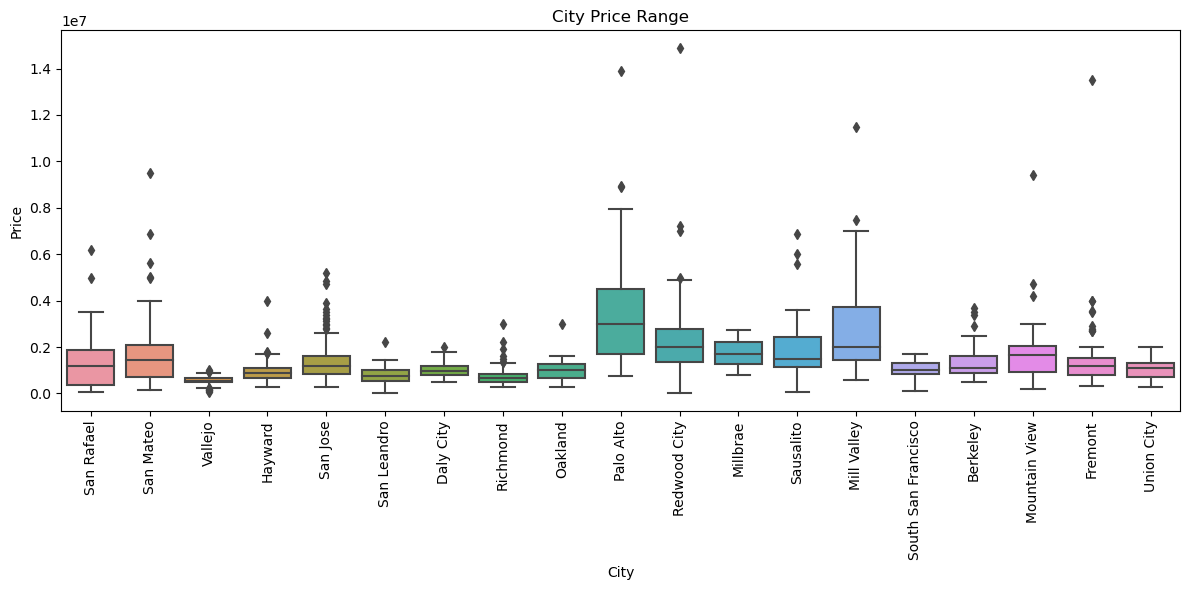

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=sales_df)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('City Price Range')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('cleaned_sales_data.csv')  # Replace with your CSV file path

# Data preprocessing (if needed)
# Ensure the 'Year_built' column is in an appropriate format (e.g., as integers)
data['Year_built'] = pd.to_numeric(data['Year_built'], errors='coerce')  # Convert to numeric, handling non-numeric values as NaN

# Define the threshold for newer and older buildings (e.g., 10 years)
current_year = pd.Timestamp.now().year
newer_threshold = current_year - 10
older_threshold = current_year - 50  # Adjust these values as needed

# Filter the data for newer and older buildings
newer_buildings = data[data['Year_built'] >= newer_threshold]
older_buildings = data[(data['Year_built'] < newer_threshold) & (data['Year_built'] >= older_threshold)]

# Get unique zip codes for newer and older buildings
newer_zipcodes = newer_buildings['Zipcode'].unique()
older_zipcodes = older_buildings['Zipcode'].unique()

print("Zip codes with newer buildings (recent areas):")
print(newer_zipcodes)

print("\nZip codes with older buildings (old areas):")
print(older_zipcodes)


Zip codes with newer buildings (recent areas):
[94560 94538 94555 94536 94539 95128 95131 95035 95125 95014 95136 95133
 95050 95123 95124 95119 95130 94542 94544 94541 94587 94578 94577 94703
 94710 94608 94705 94708 94702 94707 94806 94804 94530 94801 94803 94901
 94941 94965 94591 94592 94022 94043 94041 94040 94303 94025 94301 94306
 94063 94061 94062 94402 94010 94403 94401 94080 94014 94015]

Zip codes with older buildings (old areas):
[94555 94536 94538 94539 94587 95035 95120 95136 95128 95126 95111 95138
 95134 95135 95008 95123 95116 95121 95110 95117 95127 95148 95131 95125
 95032 95122 95054 95132 95112 95124 95037 95130 95133 95014 95113 95129
 94541 94544 94542 94545 94546 94578 94577 94579 94603 94607 94608 94612
 94611 94618 94704 94705 94710 94709 94803 94804 94530 94801 94805 94706
 94806 94901 94903 94920 94941 94965 94591 94589 94590 94592 94503 94040
 94043 94041 94085 94022 94306 94301 94303 94305 94025 94061 94063 94065
 94062 94402 94404 94401 94403 94030 94080 